In [1]:
import matplotlib.pyplot as plt
import nltk

In [2]:

nltk.download('gutenberg')
nltk.download('punkt')

paradise_lost = nltk.corpus.gutenberg.words('milton-paradise.txt')
len(paradise_lost)


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


96825

 Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site.              
-Stem or lemmatize the words and find counts.                            
-Select the top 20 words and create a bar chart.                         
-Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.                                
-Specify why you chose stemming or lemmatization.

In [3]:
#Stem words and find counts

from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords


def stem_words(text):
    nltk.download('wordnet')
    stem = PorterStemmer()

    stemmed_tokens = [stem.stem(token.lower()) for token in paradise_lost]
    stemcounts = Counter(stemmed_tokens)
    return stemcounts

stemcounts = stem_words(paradise_lost)
print(stemcounts)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Counter({',': 10198, 'and': 3395, 'the': 2968, ';': 2317, 'to': 2228, 'of': 2050, 'in': 1366, '.': 1254, 'hi': 1170, 'with': 1160, 'thi': 836, ':': 748, 'or': 715, 'that': 704, 'all': 700, 'from': 686, 'not': 626, 'their': 600, "'": 595, 'i': 590, 'but': 588, 'as': 564, 'he': 549, 'a': 545, 'on': 536, 'by': 519, 'for': 465, 'so': 445, 'heaven': 436, 'thou': 432, 'what': 391, 'they': 381, 'be': 367, 'thee': 358, 'him': 350, '-': 334, 'her': 327, 'now': 326, 'thu': 318, 'god': 316, 'which': 310, '?': 301, 'who': 294, 'me': 283, 'shall': 283, 'our': 282, 'at': 269, 's': 262, 'my': 259, 'more': 252, '!': 251, 'then': 230, 'is': 229, 'yet': 228, 'them': 226, 'when': 223, 'earth': 217, 'though': 217, 'whom': 210, 'nor': 206, 'no': 198, 'wa': 197, 'we': 193, 'will': 188, 'us': 187, 'had': 185, 'man': 176, 'if': 176, 'first': 175, 'where': 173, 'such': 169, 'these': 162, 'day': 157, 'how': 153, 'have': 153, 'high': 153, 'than': 146, 'through': 143, 'one': 142, 'it': 140, 'o': 140, 'other': 140

In [4]:
def filter_stem_words(stem_words):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    filter_words = [word for  word in stem_words if word not in stop_words]
    return filter_words

stem_words = stemcounts
filter_words = filter_stem_words(stem_words)

print(filter_words)

['[', 'paradis', 'lost', 'john', 'milton', '1667', ']', 'book', 'man', "'", 'first', 'disobedi', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'tast', 'brought', 'death', 'world', 'woe', 'loss', 'eden', 'till', 'one', 'greater', 'restor', 'us', 'regain', 'bliss', 'seat', 'sing', 'heavenli', 'muse', 'secret', 'top', 'oreb', 'sinai', 'didst', 'inspir', 'shepherd', 'taught', 'chosen', 'seed', 'begin', 'heaven', 'earth', 'rose', 'chao', ':', 'sion', 'hill', 'delight', 'thee', 'siloa', 'brook', 'flow', 'fast', 'oracl', 'god', 'thenc', 'invok', 'thi', 'aid', 'adventur', 'song', 'middl', 'flight', 'intend', 'soar', 'abov', 'th', 'aonian', 'mount', 'pursu', 'thing', 'unattempt', 'yet', 'prose', 'rhyme', '.', 'chiefli', 'thou', 'spirit', 'dost', 'prefer', 'befor', 'templ', 'upright', 'heart', 'pure', 'instruct', 'know', 'st', ';', 'wast', 'present', 'mighti', 'wing', 'outspread', 'dove', '-', 'like', 'sat', 'brood', 'vast', 'abyss', 'mad', 'pregnant', 'dark', 'illumin', 'low', 'rais', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


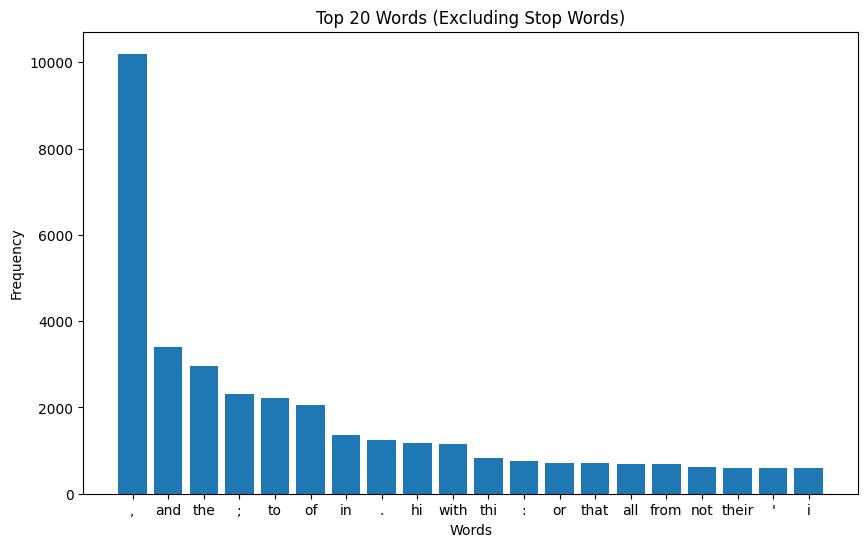

In [5]:

words_number = Counter(stem_words)

top_words = Counter(dict(sorted(words_number.items(), key=lambda item: item[1], reverse=True)[:20]))

    # Plot top 20 words
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 20 Words (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

 I chose stemming over lemmatization because it is more basic since precise accuracy was not needed. Also, it allowed for words that had the same root to be counted, so it made the coding easier.

Perform Vader Sentiment Analysis on the book.               
-Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.htmlLinks to an external site. This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


sentences = nltk.sent_tokenize(paradise_lost)

sid = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment scores and sentences
sentiment_scores = []
positive_sentences = []


# Perform Vader Sentiment Analysis on each sentence
for sentence in sentences:
    # Get the sentiment score for the sentence
    score = sid.polarity_scores(sentence)
    sentiment_scores.append((sentence, score['compound']))

# Sort the sentences based on their sentiment scores
sentiment_scores.sort(key=lambda x: x[1])

# Extract the top 5 most negative, most positive, and most neutral sentences
most_positive = sentiment_scores[-5:]

# Extract the sentences from the tuples
most_positive_sentences = [sentence for sentence, _ in most_positive]

print("\nTop 5 most positive sentences:")
for sentence in most_positive_sentences:
    print(sentence)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aarushichoudhary/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


TypeError: expected string or bytes-like object

In [ ]:
negative_sentences = []
neutral_sentences = []
most_negative = sentiment_scores[:5]
most_neutral = sentiment_scores[len(sentiment_scores)//2-3:len(sentiment_scores)//2+2]
most_negative_sentences = [sentence for sentence, _ in most_negative]
most_neutral_sentences = [sentence for sentence, _ in most_neutral]


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentences(paradise_lost):
    paradise_lost = nltk.corpus.gutenberg.raw('milton-paradise.txt')

    sentences = nltk.sent_tokenize(paradise_lost)
    
    sid = SentimentIntensityAnalyzer()
    sid_scores = []
    
    for sentence in sentences:
        # Get the sentiment score for the sentence
        score = sid.polarity_scores(sentence)
        sentiment_scores.append((sentence, score['compound']))
    
    # Sort the sentences based on their sentiment scores
    sentiment_scores.sort(key=lambda x: x[1])
    
    # Extract the top 5 most negative, most positive, and most neutral sentences
    most_negative = sentiment_scores[:5]
    most_positive = sentiment_scores[-5:]
    most_neutral = sentiment_scores[len(sentiment_scores)//2-3:len(sentiment_scores)//2+2]
    
    # Extract the sentences from the tuples
    most_negative_sentences = [sentence for sentence, _ in most_negative]
    most_positive_sentences = [sentence for sentence, _ in most_positive]
    most_neutral_sentences = [sentence for sentence, _ in most_neutral]
    
    return most_negative_sentences, most_positive_sentences, most_neutral_sentences

# Example usage:
paradise_lost_text = nltk.corpus.gutenberg.raw('milton-paradise.txt')
most_negative, most_positive, most_neutral = analyze_sentiments(paradise_lost_text)

print("Top 5 most negative sentences:")
for sentence in most_negative:
    print(sentence)

print("\nTop 5 most positive sentences:")
for sentence in most_positive:
    print(sentence)

print("\nTop 5 most neutral sentences:")
for sentence in most_neutral:
    print(sentence)
